In [1]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

from util import get_normalized_data, error_rate, cost, y2indicator
from mlp import forward, derivative_w2, derivative_w1, derivative_b2, derivative_b1
# get_normalize_data returns data with all 784 features

Compare 3 scenarios:
1. batch SGD
2. batch SGD with Momentum
3. batch SGD with Nesterov Momentum

In [2]:
# 1. batch sgd
max_iter=20 # make it 30 for sigmoid
print_period = 10

X, Y = get_normalized_data()
lr = 0.00004
reg = 0.01

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest = X[-1000:,]
Ytest = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

N, D = Xtrain.shape
batch_sz = 500
n_batches = N // batch_sz

M = 300
K = 10
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

# 1. batch
# cost = -16
LL_batch = []
CR_batch = []
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        
        # updates
        W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        W1 -= lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)
        
        if j % print_period == 0:
            # Calculate just for LL
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            # print "pY:", pY
            ll = cost(pY, Ytest_ind)
            LL_batch.append(ll)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))
            
            err = error_rate(pY, Ytest)
            CR_batch.append(err)
            print("Error rate:", err)
            
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

Reading in and transforming data...


/Users/admin/Code/udemy_courses/4_practical_deep_learning_tensorflow/util.py:104: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ind[i, y[i]] = 1


Cost at iteration i=0, j=0: 2377.824863
Error rate: 0.88
Cost at iteration i=0, j=10: 2211.242209
Error rate: 0.743
Cost at iteration i=0, j=20: 2109.494901
Error rate: 0.611
Cost at iteration i=0, j=30: 2018.387543
Error rate: 0.495
Cost at iteration i=0, j=40: 1933.422764
Error rate: 0.406
Cost at iteration i=0, j=50: 1850.454977
Error rate: 0.358
Cost at iteration i=0, j=60: 1776.171551
Error rate: 0.36
Cost at iteration i=0, j=70: 1703.042456
Error rate: 0.317
Cost at iteration i=0, j=80: 1634.213660
Error rate: 0.294
Cost at iteration i=1, j=0: 1620.511411
Error rate: 0.299
Cost at iteration i=1, j=10: 1558.093074
Error rate: 0.275
Cost at iteration i=1, j=20: 1497.773179
Error rate: 0.27
Cost at iteration i=1, j=30: 1443.326979
Error rate: 0.259
Cost at iteration i=1, j=40: 1391.808349
Error rate: 0.248
Cost at iteration i=1, j=50: 1341.304198
Error rate: 0.243
Cost at iteration i=1, j=60: 1297.225578
Error rate: 0.252
Cost at iteration i=1, j=70: 1253.622515
Error rate: 0.228
Co

In [3]:
# 2. batch with momentum
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL_momentum = []
CR_momentum = []
mu = 0.9
dW2 = 0
db2 = 0
dW1 = 0
db1 = 0
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz)]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        
        # updates
        dW2 = mu*dW2 - lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        W2 += dW2
        db2 = mu*db2 - lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        b2 += db2
        dW1 = mu*dW1 - lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        W1 += dW1
        db1 = mu*db1 - lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)
        b1 += db1
        
        if j % print_period == 0:
            # calculate just for LL
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            ll = cost(pY, Ytest_ind)
            LL_momentum.append(ll)
            print("cost at iteration i=%d, j=%d:%.6f" % (i, j, ll))
            
            err = error_rate(pY, Ytest)
            CR_momentum.append(err)
            print("Error rate:", err)
            
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

cost at iteration i=0, j=0:2312.865022
Error rate: 0.829
cost at iteration i=0, j=10:1814.141607
Error rate: 0.354
cost at iteration i=0, j=20:1281.621228
Error rate: 0.246
cost at iteration i=0, j=30:948.323424
Error rate: 0.2
cost at iteration i=0, j=40:756.251506
Error rate: 0.17
cost at iteration i=0, j=50:647.314203
Error rate: 0.161
cost at iteration i=0, j=60:578.630100
Error rate: 0.151
cost at iteration i=0, j=70:530.565051
Error rate: 0.138
cost at iteration i=0, j=80:495.991554
Error rate: 0.136
cost at iteration i=1, j=0:489.521982
Error rate: 0.132
cost at iteration i=1, j=10:464.218517
Error rate: 0.127
cost at iteration i=1, j=20:444.336295
Error rate: 0.123
cost at iteration i=1, j=30:427.633164
Error rate: 0.114
cost at iteration i=1, j=40:415.101709
Error rate: 0.116
cost at iteration i=1, j=50:402.312543
Error rate: 0.108
cost at iteration i=1, j=60:394.449933
Error rate: 0.115
cost at iteration i=1, j=70:382.852490
Error rate: 0.105
cost at iteration i=1, j=80:375.8

In [4]:
# batch with Nesterov momentum
# 2. batch with momentum
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)
LL_nest = []
CR_nest = []
mu = 0.9
dW2 = 0
db2 = 0
dW1 = 0
db1 = 0
for i in range(max_iter):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz)]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        
        # updates
        dW2 = mu*mu*dW2 - (1 + mu)*lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        W2 += dW2
        db2 = mu*mu*db2 - (1 + mu)*lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        b2 += db2
        dW1 = mu*mu*dW1 - (1 + mu)*lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        W1 += dW1
        db1 = mu*mu*db1 - (1 + mu)*lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)
        b1 += db1
        
        if j % print_period == 0:
            # calculate just for LL
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            ll = cost(pY, Ytest_ind)
            LL_nest.append(ll)
            print("cost at iteration i=%d, j=%d:%.6f" % (i, j, ll))
            
            err = error_rate(pY, Ytest)
            CR_nest.append(err)
            print("Error rate:", err)
            
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

cost at iteration i=0, j=0:2398.434684
Error rate: 0.854
cost at iteration i=0, j=10:1695.803978
Error rate: 0.394
cost at iteration i=0, j=20:1164.663119
Error rate: 0.233
cost at iteration i=0, j=30:891.360444
Error rate: 0.181
cost at iteration i=0, j=40:735.565924
Error rate: 0.161
cost at iteration i=0, j=50:642.146885
Error rate: 0.166
cost at iteration i=0, j=60:583.462720
Error rate: 0.156
cost at iteration i=0, j=70:537.807980
Error rate: 0.132
cost at iteration i=0, j=80:503.295911
Error rate: 0.133
cost at iteration i=1, j=0:496.348714
Error rate: 0.13
cost at iteration i=1, j=10:471.795734
Error rate: 0.132
cost at iteration i=1, j=20:451.559663
Error rate: 0.127
cost at iteration i=1, j=30:434.777005
Error rate: 0.123
cost at iteration i=1, j=40:420.387339
Error rate: 0.12
cost at iteration i=1, j=50:408.749099
Error rate: 0.115
cost at iteration i=1, j=60:401.081297
Error rate: 0.116
cost at iteration i=1, j=70:388.554315
Error rate: 0.112
cost at iteration i=1, j=80:380.

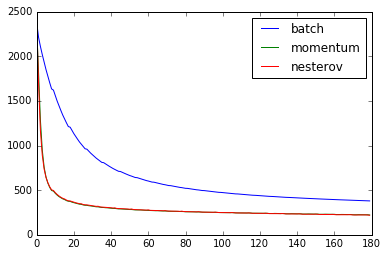

In [5]:
plt.plot(LL_batch, label="batch")
plt.plot(LL_momentum, label="momentum")
plt.plot(LL_nest, label="nesterov")
plt.legend()
plt.show() # beats batch, goes much faster, although nesterov appears to go roughly the same speed